In [114]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

99% kernal

In [141]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")
full = train.append(test, ignore_index = True )

In [142]:
train1 = train.copy(deep = True)

In [116]:
titanic = full[:891]
del train , test
titanic.columns
#titanic[:2]['Age']

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [117]:
def findnan(df, n):    
    '''n = column, use for checking individual columns'''
    count = []
    for i in df[n]:
        if pd.isnull(i) == True:
            count.append(i)
    print('{0} = {1}'.format(n, len(count)))
    
def allnans(df):
    for i in df.columns:
        findnan(df, i)
        
def empty(df, n):
    '''pandas automatically fills empty cells as NAN'''
    count = []
    for i in df[n]:
        if i == '':
            count.append(i)
    return len(count)
    pass

In [118]:
#allnans(full)

### Embarked

In [122]:
from collections import Counter
Counter(full.Embarked)

Counter({'C': 270, 'Q': 123, 'S': 916})

In [120]:
full.Embarked = full.Embarked.fillna('S')

In [121]:
embarked = pd.get_dummies(full.Embarked, prefix='embarked', 
                          drop_first=True)

In [123]:
embarked.head(1) # multiply columns, must concantenate

,embarked_Q,embarked_S
0,0,1


In [124]:
full.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171


In [125]:
full = pd.concat([full, embarked], axis = 1)

In [126]:
full.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,embarked_Q,embarked_S
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,1


### Sex

In [127]:
Counter(full.Sex)

Counter({'female': 466, 'male': 843})

In [128]:
full['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [129]:
full['Sex'].unique() #nunique

array(['male', 'female'], dtype=object)

In [130]:
type(full['Sex'][2])

str

In [131]:
sex = pd.get_dummies(full.Sex,drop_first=True)

In [132]:
# attach to original df for graphing
full['sex'] = sex

In [133]:
full.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,embarked_Q,embarked_S,sex
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,1,1


In [134]:
full = pd.concat([sex, full], axis = 1) #note: column names change

In [135]:
full.head(1)

,male,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,embarked_Q,embarked_S,sex
0,1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,1,1


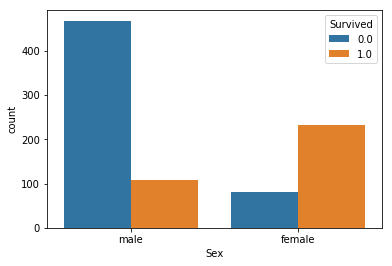

In [139]:
sns.countplot(x='Sex', hue = 'Survived', data=full)

In [63]:
sns.factorplot(x="male", y="Embarked", hue = 'Survived', data= full, palette='rainbow')

ValueError: Neither the `x` nor `y` variable appears to be numeric.